In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [42]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8263,8264,15584453,Burtch,555,Spain,Male,32,10,0.00,2,0,1,168605.96,0
3393,3394,15600626,Bradley,710,France,Male,30,6,0.00,2,1,1,8991.17,0
6475,6476,15566030,Tu,497,Germany,Male,41,5,80542.81,1,0,0,88729.22,1
9746,9747,15782550,Ma,490,Germany,Female,41,0,139659.04,1,1,1,176254.12,0
9932,9933,15813451,Fleetwood-Smith,677,Spain,Male,18,8,134796.87,2,1,1,114858.90,0


In [43]:
df.shape

(10000, 14)

In [44]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [47]:
df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = df[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype(int)


In [48]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1372,489,38,8,0.00,2,0,1,196990.79,0,0,0,1
2748,401,48,8,128140.17,1,1,0,175753.55,1,1,0,1
4384,728,37,0,0.00,2,1,1,72203.80,0,0,0,1
9344,727,28,2,110997.76,1,1,0,101433.76,0,0,0,0
2516,814,36,6,0.00,2,1,1,98657.01,0,0,0,0


In [49]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [53]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7803 - loss: 0.5436 - val_accuracy: 0.7969 - val_loss: 0.4702
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7953 - loss: 0.4639 - val_accuracy: 0.7969 - val_loss: 0.4444
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7925 - loss: 0.4439 - val_accuracy: 0.7975 - val_loss: 0.4331
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8011 - loss: 0.4283 - val_accuracy: 0.8119 - val_loss: 0.4250
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8152 - loss: 0.4182 - val_accuracy: 0.8206 - val_loss: 0.4195
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 - loss: 0.4252 - val_accuracy: 0.8231 - val_loss: 0.4144
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8345 - loss: 0.4080 - val_accuracy: 0.8250 - val_loss: 0.4088
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8374 - loss: 0.3972 - val_accu

In [57]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [58]:
y_pred = y_pred.argmax(axis=-1)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

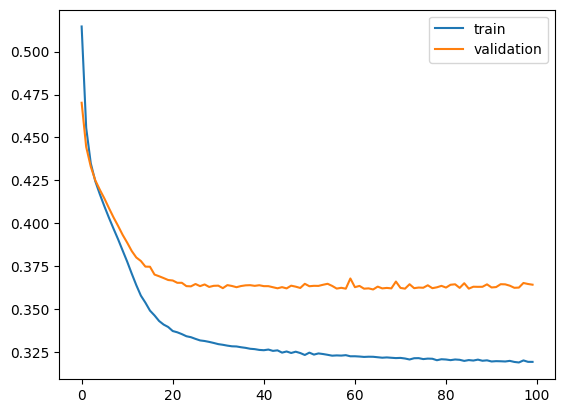

In [60]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

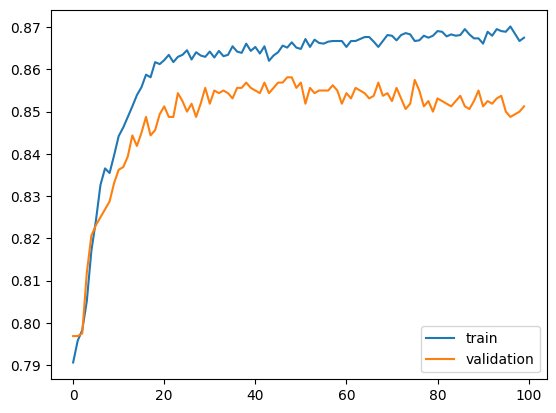

In [61]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()